<a href="https://colab.research.google.com/github/chow33/Applied-Deep-Learning-and-Artificial-Intelligence-Chow-and-Signe/blob/main/Final_part_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, you are required to delve into the practical aspects of Deep Learning by constructing and evaluating a neural network using PyTorch. This exercise is designed to deepen your understanding of neural network architectures, hyperparameter tuning, and the preprocessing steps necessary for effective model training and evaluation. You will have the freedom to choose a dataset from either the M1 or M2 module or select an external dataset that intrigues you. By experimenting with different neural network configurations and hyperparameters, you will gain hands-on experience in optimizing ML models to achieve desired performance metrics.

# Task
Build, train, and evaluate a neural network using Pytorch.
The neural network should have a minimum of 2 hidden layers.
Experiment with at least 5 different variations of hyperparameters (e.g., number of layers/neurons, activation functions, epochs, optimizers, learning rates, etc.).
The assignment should include the following steps:

* Feature Selection
* Feature Engineering (if necessary)
* Standard ML Preprocessing (if necessary)
* Train-Test Split
* Defining a Neural Network Architecture in Pytorch
* Defining a Training Loop
* Training the Model
* Experimenting with Different Hyperparameters
* Evaluating the Final Model on the Test Data

#Importing data

In [ ]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
import torch
# load dataset
data_raw = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
data_raw.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_raw.shape

(768, 9)

In [ ]:
data_raw.index

RangeIndex(start=0, stop=768, step=1)

In [ ]:
data_raw = data_raw.dropna()

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

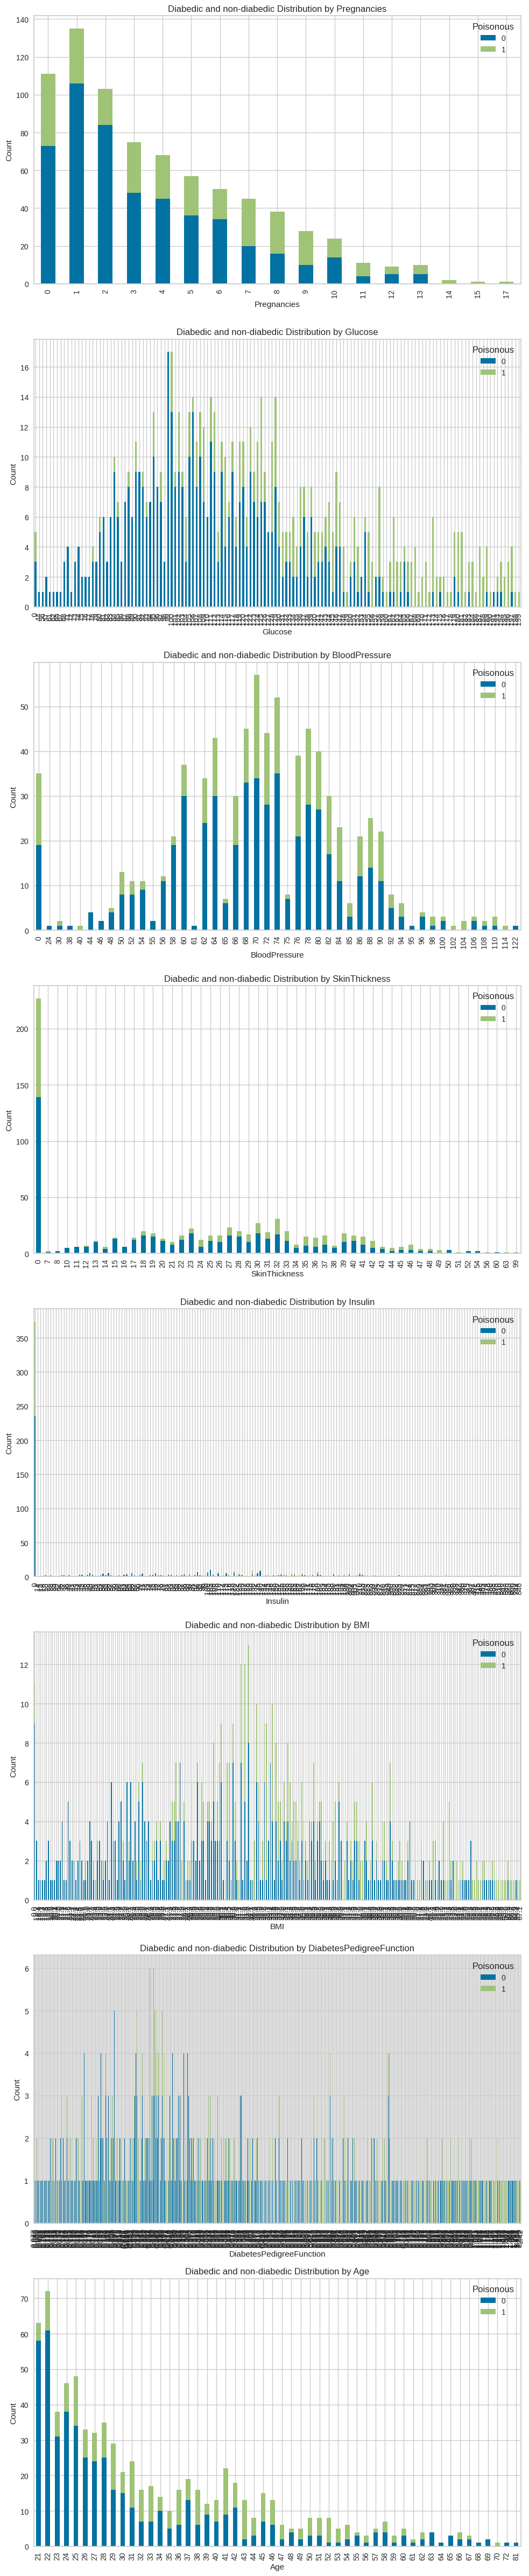

In [ ]:
# Get a list of all columns except the 'class' column
feature_columns = data_raw.columns[data_raw.columns != 'Outcome']

# Create subplots to display bar charts for each feature
fig, axes = plt.subplots(nrows=len(feature_columns), ncols=1, figsize=(10, 6 * len(feature_columns)))

# Iterate through each feature column and create a bar chart
for i, column in enumerate(feature_columns):
    pivot_table = data_raw.pivot_table(index=column, columns='Outcome', aggfunc='size', fill_value=0)
    ax = pivot_table.plot(kind='bar', stacked=True, ax=axes[i])
    ax.set_title(f'Diabedic and non-diabedic Distribution by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title='Poisonous')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

For the data for DiabetesPedigreeFunction, BMI, Insulin and Glucose is not readable from the above vizualiazation. Therefore will be do indiviuel value counts below to see of there is any problematic results

## DiabetesPedigreeFunction

In [ ]:
data_raw['DiabetesPedigreeFunction'].value_counts().sort_index()

0.078    1
0.084    1
0.085    2
0.088    2
0.089    1
        ..
1.893    1
2.137    1
2.288    1
2.329    1
2.420    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

From the above we can see that non of the values are appreing 0 times and moreover there is no null values

## BMI

In [ ]:
data_raw['BMI'].value_counts().sort_index()

0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Name: BMI, Length: 248, dtype: int64

From the above we can see that even though we have made the isnull, we have 11 observations where they have a BMI on 0. This is not medically posible, therefore will these be dropped in the data cleaning

## Insulin

In [ ]:
data_raw['Insulin'].value_counts().sort_index()

0      374
14       1
15       1
16       1
18       2
      ... 
579      1
600      1
680      1
744      1
846      1
Name: Insulin, Length: 186, dtype: int64

Given that this is the detiction of a medical product in the blood stream after 2 hours it is possible to have 0 units of it left efter the time periode

## Glucose

In [ ]:
data_raw['Glucose'].value_counts().sort_index()

0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: Glucose, Length: 136, dtype: int64

It is not physiologically possible for a person to have a blood glucose concentration of exacly 0 without it being a life threathing situation therefore we will filter the 5 zero results in the data cleaning

## Cleaning of the data

In the following section we clean the data so that all the before dicussed "0" value is excluded in the futher exploration of the assignment

In [ ]:
data_raw = data_raw[data_raw['BloodPressure']!=0]

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               733 non-null    int64  
 1   Glucose                   733 non-null    int64  
 2   BloodPressure             733 non-null    int64  
 3   SkinThickness             733 non-null    int64  
 4   Insulin                   733 non-null    int64  
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  733 non-null    float64
 7   Age                       733 non-null    int64  
 8   Outcome                   733 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.3 KB


In [ ]:
data_raw = data_raw[data_raw['BMI']!=0]

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               729 non-null    int64  
 1   Glucose                   729 non-null    int64  
 2   BloodPressure             729 non-null    int64  
 3   SkinThickness             729 non-null    int64  
 4   Insulin                   729 non-null    int64  
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  729 non-null    float64
 7   Age                       729 non-null    int64  
 8   Outcome                   729 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.0 KB


In [ ]:
data_raw = data_raw[data_raw['Glucose']!=0]

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.6 KB


We will now check if there is any na values in the dataset

In [ ]:
nan_values = data_raw.isna()

In [ ]:
nan_count = nan_values.sum()

In [ ]:
print(nan_count)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
if nan_count.sum() > 0:
    print("\nThere are NaN values in the dataset.")
else:
    print("\nNo NaN values found in the dataset.")


No NaN values found in the dataset.


From the above there should be no Nan values in the dataset

To get a deeper understanding of the data we will dislay the new raw data we are workning with and the statistics of it

In [ ]:
data_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,21.443370,15.732756,0.000,0.000,24.000,33.0000,99.00
Insulin,724.0,84.494475,117.016513,0.000,0.000,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


In [ ]:
data_raw.shape

(724, 9)

In [ ]:
data_raw.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,  10,  11,
            ...
            758, 759, 760, 761, 762, 763, 764, 765, 766, 767],
           dtype='int64', length=724)

In [ ]:
data_raw.columns.unique()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

We will in the further section do a train_test_split of the data with the feature "Outcome" as the target.

Therefor will we look at the unique values of the feature and look at the distribution of the values

In [ ]:
data_raw.Outcome.unique()

array([1, 0])

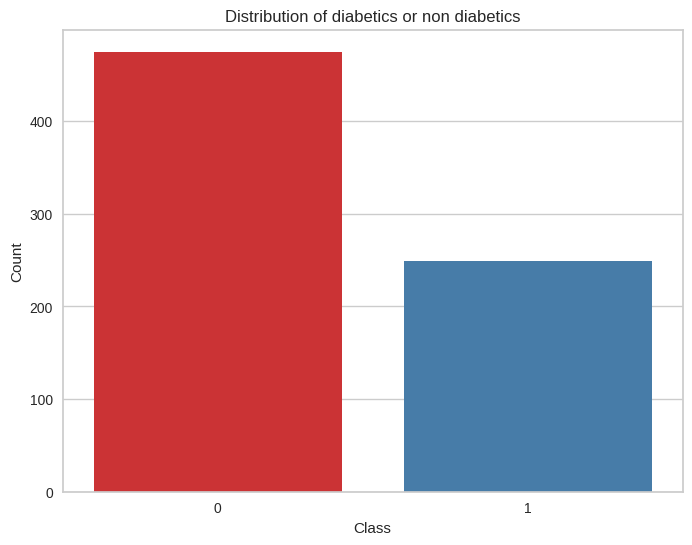

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_raw, x='Outcome', palette='Set1')
plt.title('Distribution of diabetics or non diabetics')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

From the above visualization it can be seen that the target value is binary and can be charectarised as un-balanced.

This will be taken into account in split of the data

#Feature importance

We now would like to look at the feature importance of the dataset

We will do this by looking at a headmap and a yellowbrick algorithm

#### Heatmap

Heatmap is a tool that can be used for data visualization where data is represented using a color-coded matrix. It shows the correlation between features included in the dataset, where the color represent the intensity of the corolation.

In [ ]:
corr_matrix_pearson = data_raw.corr(method='pearson')

In [ ]:
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


In [ ]:
import seaborn as sns

<Axes: >

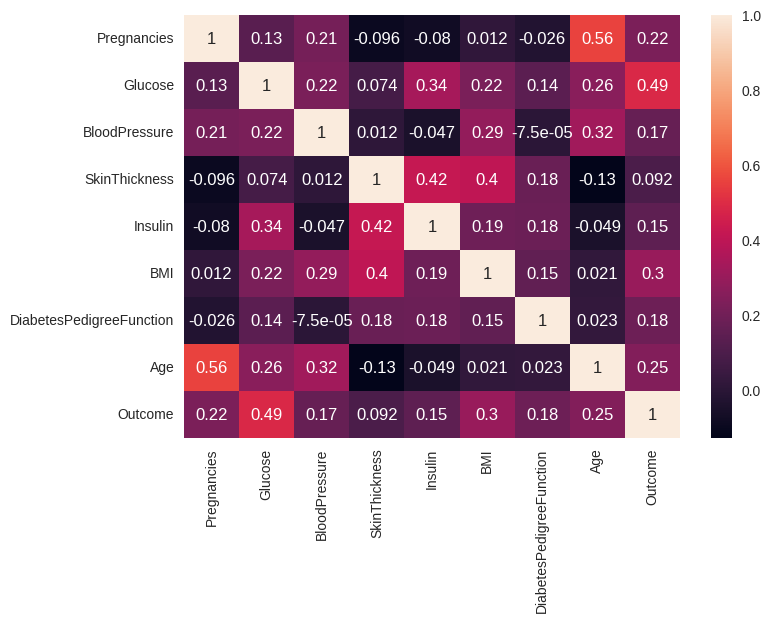

In [ ]:
sns.heatmap(corr_matrix_pearson, annot = True)

In the above code we have made a heatmap over the different features. We are intrested to look at the heatmap in regards to outcome, which will be our target.

Here we can see that the correlation between Outcome and the other feature. From this we can see that the features that has the greatest correlation with outcome is Glucose, Age and BMI. Therefore those feature could be the one that has the greatest importance for the output.

But to get a better idea of which features that should be included in the futher modelling, we are going to do a feature importance analysis

## Feature importance steps

To investagate the feature importance in the dataset we will need to finish other steps before we can get the

### Preprocessing

In the following preprocessing section we perform preprocessing of the data. First we split the data into the "X" section and a "y" section, by using the iloc function. When separating the "X" section we make a value for the features used in the section, becasues for some reason we lose them when scaling the data. We use the **MinMaxScaler** on the data saves in the "X" section, so that one feature dont overpower the other data when doing further work with the data.

In [ ]:
data_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_raw.iloc[:,:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
X = data_raw.iloc[:,:8]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
feature_names = X.columns.tolist()

The **MinMaxScaler** scales the feature values so that it is transformed in a range spanding from 0 to 1


In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [ ]:
data_raw.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 724, dtype: int64

In [ ]:
y = data_raw.Outcome

In [ ]:
y.value_counts()

0    475
1    249
Name: Outcome, dtype: int64

### Fit model

In the following section we fit the model into a train_test_split with a random_state set to 42. The random state is added so that it is possible to reproduce the results in the future

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =42)

In [ ]:
X_train

array([[0.        , 0.6       , 0.6122449 , ..., 0.18609407, 0.06532878,
        0.63333333],
       [0.17647059, 0.21935484, 0.26530612, ..., 0.26175869, 0.07258753,
        0.08333333],
       [0.05882353, 0.24516129, 0.40816327, ..., 0.06134969, 0.14389411,
        0.03333333],
       ...,
       [0.29411765, 0.71612903, 0.6122449 , ..., 0.4192229 , 0.23099915,
        0.21666667],
       [0.29411765, 0.28387097, 0.55102041, ..., 0.19222904, 0.07685739,
        0.26666667],
       [0.17647059, 0.81935484, 0.48979592, ..., 0.30879346, 0.05166524,
        0.05      ]])

In [ ]:
X_test

array([[0.05882353, 0.61290323, 0.2244898 , ..., 0.21472393, 0.24594364,
        0.01666667],
       [0.05882353, 0.28387097, 0.3877551 , ..., 0.2392638 , 0.14688301,
        0.03333333],
       [0.64705882, 0.43225806, 0.6122449 , ..., 0.58486708, 0.3616567 ,
        0.4       ],
       ...,
       [0.35294118, 0.6       , 0.37755102, ..., 0.12269939, 0.03116994,
        0.56666667],
       [0.58823529, 0.67096774, 0.6122449 , ..., 0.39672802, 0.3941076 ,
        0.5       ],
       [0.23529412, 0.70967742, 0.3877551 , ..., 0.29856851, 0.06789069,
        0.03333333]])

In [ ]:
y_train

475    0
6      1
450    0
635    1
438    0
      ..
77     0
114    1
286    0
463    0
110    1
Name: Outcome, Length: 579, dtype: int64

In [ ]:
y_test

346    0
553    0
590    1
36     0
399    1
      ..
478    0
351    0
401    0
458    1
144    0
Name: Outcome, Length: 145, dtype: int64

## SMOTE

As it was established ealier in the section, we have an unbalanced target. To account for this we apply a SMOTE to balance it. SMOTE is a over-sample method, which is used to get a balanced target.

**Synthetic Data Generation
        SMOTE** (Synthetic Minority Over-sampling Technique): Instead of duplicating entries, SMOTE creates new synthetic samples in the feature space. It does this by selecting two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Assuming X_train and y_train are your training data and labels
X_train_resampled, y_train_resampled = SMOTE(random_state = 42).fit_resample(X_train, y_train)

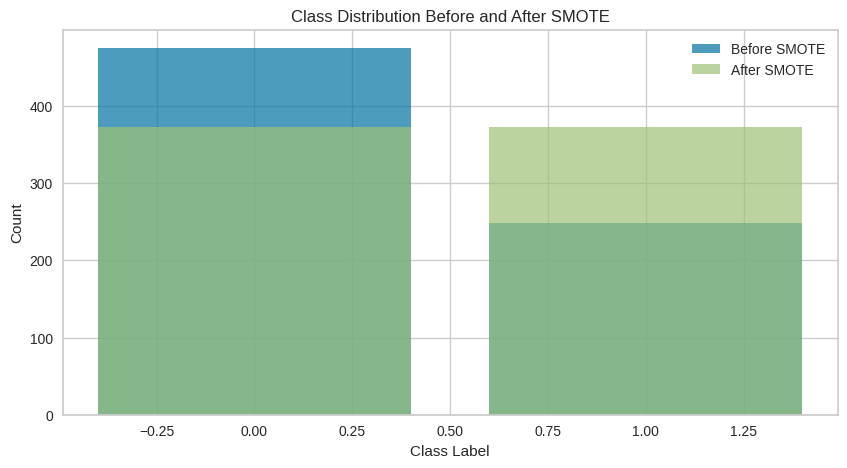

In [ ]:
import matplotlib.pyplot as plt

# Count the class distribution before and after SMOTE
class_distribution_before = y.value_counts()
class_distribution_after = pd.Series(y_train_resampled).value_counts()

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_distribution_before.index, class_distribution_before.values, label='Before SMOTE', alpha=0.7)
plt.bar(class_distribution_after.index, class_distribution_after.values, label='After SMOTE', alpha=0.7)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.legend()
plt.title('Class Distribution Before and After SMOTE')
plt.show()

In [ ]:
# Now, X_train_resampled and y_train_resampled contain the resampled data
# You can split this resampled data into train and validation sets for model training
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

### Feature importance with yellowbrick

This library is essentially an extension of the scikit-learn library and provides some really useful and pretty looking visualisations for machine learning models. The visualiser objects, the core interface, are scikit-learn estimators and so if you are used to working with scikit-learn the workflow should be quite familiar.

The visualisations that can be rendered cover model selection, feature importances and model performance analysis.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

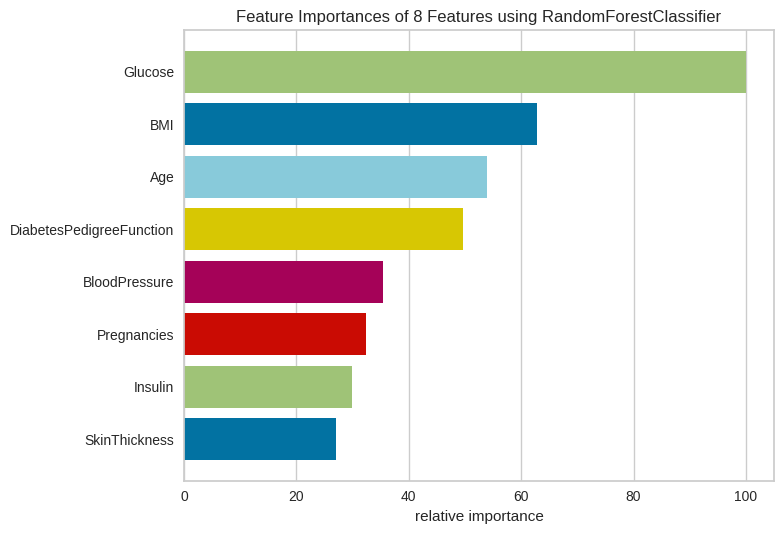

<Axes: title={'center': 'Feature Importances of 8 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [ ]:
# Feature importance
from yellowbrick.features import FeatureImportances

viz = FeatureImportances(model, labels=feature_names)
viz.fit(X, y)
viz.show()

In the above Yellowbrick feature importance. Here it can be seen that the features Glucose, BMI, Age and DiatetesPedigreeFunction have the greatest importance in regard

# Other

In [ ]:
y_test_numpy = y_test.to_numpy()

In [ ]:
# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_resampled[:, [1, 5, 6, 7]], dtype=torch.float32)
X_test_tensor = torch.tensor(X_test[:, [1, 5, 6, 7]], dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_numpy, dtype=torch.float32)



In [ ]:
X_train_tensor.shape

torch.Size([596, 4])

In [ ]:
X_test_tensor.shape

torch.Size([145, 4])

In [ ]:
X_train_tensor[i]

tensor([0.5419, 0.3292, 0.0961, 0.0500])

In [ ]:
print(X_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([596, 4])
torch.Size([596])


In this training model we have used a multi-layer Perceptron (MLP) to create a trainings model, because it can have multiple hidden layers and account for binary outcome. This is done by setting the architecture of the neural network to end with a sigmoid and the hidden layer is created using a RELU activation function, which is the non-linear part. The reason for using RELU is becuase the data set does not have any negative number and the prediction should result in a binary prediction between 0 and 1. This mean the loss function for a binary result need to be either a BCELoss function or a BCELossWithLogit, but because a sigmoid has been used for our output in the model, then the best loss function is the BCELoss. The optimization approach used is a stochastic gradient descent, the reason is that it is computationally efficient because it updates the model parameters using one data point at a time, which is suitable for small data set and the diabetese data set has less than 1000 data point and the it also prevent the model from overfitting by introducing noise.


 The training model will start with a random number of epoch and learning_rate to determined how good the model is. The architecture of our neural network is a 7 layer network with 2 hidden layer from relu and an output layer as Sigmoid to make it binary. The number of neurons started is 10 to make sure that it can computate all 4 inputs.

# First Model variation

In [ ]:
import torch.nn as nn

# Initializing Hyperparameters
epochs = 20
learning_rate = 3

# # Initializing Parameters

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_1 = nn.Sequential(nn.Linear(4, 10),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),

                                 torch.nn.Linear(10, 4),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.1),

                                 nn.Linear(4, 1),
                                 nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_1.forward(X_train_tensor[i].reshape(1, 4))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-144-2a23f5eae76a>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch 1 Average Loss: 1.0100
--------------------------------------------------


Epoch 2 Average Loss: 1.0044
--------------------------------------------------


Epoch 3 Average Loss: 1.0044
--------------------------------------------------


Epoch 4 Average Loss: 1.0044
--------------------------------------------------


Epoch 5 Average Loss: 1.0044
--------------------------------------------------


Epoch 6 Average Loss: 1.0044
--------------------------------------------------


Epoch 7 Average Loss: 1.0044
--------------------------------------------------


Epoch 8 Average Loss: 1.0044
--------------------------------------------------


Epoch 9 Average Loss: 1.0044
--------------------------------------------------


Epoch 10 Average Loss: 1.0044
--------------------------------------------------


Epoch 11 Average Loss: 1.0044
--------------------------------------------------


Epoch 12 Average Loss: 1.0044
--------------------------------------------------


Epoch 13 Ave

The resulting average loss is too big for a binary loss, where the expected loss should be less than 1 as the prediction would only be between 1 and 0. Furthermore the average loss is converging too fast, which lead into problem of training the model, as it seems like the model would not learn anything after 2 epochs. To change this the model has to become more simple with less neurons and making the learning rate smaller to make the model converge slower and less epochs as the previous model converge too fast and it wasn't neccessary and to save computational power.

#   Second Model variation

In [ ]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 1
# # Initializing Parameters
loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_2 = nn.Sequential(nn.Linear(4, 6),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),

                                 torch.nn.Linear(6, 3),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.1),

                                 nn.Linear(3, 1),
                                 nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_2.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_2.forward(X_train_tensor[i].reshape(1, 4))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-145-db512a53a85a>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.7675
--------------------------------------------------


Epoch 2 Average Loss: 0.7661
--------------------------------------------------


Epoch 3 Average Loss: 0.7660
--------------------------------------------------


Epoch 4 Average Loss: 0.7659
--------------------------------------------------


Epoch 5 Average Loss: 0.7661
--------------------------------------------------


Epoch 6 Average Loss: 0.7659
--------------------------------------------------


Epoch 7 Average Loss: 0.7659
--------------------------------------------------


Epoch 8 Average Loss: 0.7659
--------------------------------------------------


Epoch 9 Average Loss: 0.7659
--------------------------------------------------


Epoch 10 Average Loss: 0.7659
--------------------------------------------------



Model 2 has a better average loss, but it is converging too fast, which may have been because of a learning rate that is too high and overfitting. This time the learning rate has been decreased by a lot to make sure the training model does not converge too fast, and a change in neurons has been created to simplify the model as it already has two hidden layers. This model have a fine loss function and with a slow convergence, which means the model is still working in other epochs.

# Third Model variation

In [ ]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.1
# # Initializing Parameters
loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_3 = nn.Sequential(nn.Linear(4, 6),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),

                                 torch.nn.Linear(6, 3),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.1),

                                 nn.Linear(3, 1),
                                 nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_3.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_3.forward(X_train_tensor[i].reshape(1, 4))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-146-625d208b729d>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.7030
--------------------------------------------------


Epoch 2 Average Loss: 0.7015
--------------------------------------------------


Epoch 3 Average Loss: 0.7015
--------------------------------------------------


Epoch 4 Average Loss: 0.7015
--------------------------------------------------


Epoch 5 Average Loss: 0.6966
--------------------------------------------------


Epoch 6 Average Loss: 0.6603
--------------------------------------------------


Epoch 7 Average Loss: 0.6349
--------------------------------------------------


Epoch 8 Average Loss: 0.6355
--------------------------------------------------


Epoch 9 Average Loss: 0.6122
--------------------------------------------------


Epoch 10 Average Loss: 0.6221
--------------------------------------------------



Model 3 is oscillating a little bit at the end, which means the learning rate could be too high, and it may have been overfitted, which is why the next model will decrease the learning rate and increase the dropout rate to make the model less overfitted.

# Fourth Model Variation

In [ ]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.01
# # Initializing Parameters
loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_4 = nn.Sequential(nn.Linear(4, 6),
                                 nn.ReLU(),
                                 nn.Dropout(0.15),

                                 torch.nn.Linear(6, 3),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.15),

                                 nn.Linear(3, 1),
                                 nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_4.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_4.forward(X_train_tensor[i].reshape(1, 4))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-147-c712ed905860>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.6942
--------------------------------------------------


Epoch 2 Average Loss: 0.6922
--------------------------------------------------


Epoch 3 Average Loss: 0.6903
--------------------------------------------------


Epoch 4 Average Loss: 0.6851
--------------------------------------------------


Epoch 5 Average Loss: 0.6783
--------------------------------------------------


Epoch 6 Average Loss: 0.6725
--------------------------------------------------


Epoch 7 Average Loss: 0.6476
--------------------------------------------------


Epoch 8 Average Loss: 0.6312
--------------------------------------------------


Epoch 9 Average Loss: 0.6060
--------------------------------------------------


Epoch 10 Average Loss: 0.5901
--------------------------------------------------



Model 4 seems good with a nice decreasing average loss, but the reduction is too small and the model could become better. This can be fixed by giving the model more time and increase the epochs.

# Fifth Model variation

In [ ]:
# Initializing Hyperparameters
epochs = 20
learning_rate = 0.01
# # Initializing Parameters
loss_set_5 = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_5 = nn.Sequential(nn.Linear(4, 6),
                                 nn.ReLU(),
                                 nn.Dropout(0.15),

                                 torch.nn.Linear(6, 3),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.15),

                                 nn.Linear(3, 1),
                                 nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_5.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_5.forward(X_train_tensor[i].reshape(1, 4))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set_5[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-148-beceed71bd2a>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.6986
--------------------------------------------------


Epoch 2 Average Loss: 0.6947
--------------------------------------------------


Epoch 3 Average Loss: 0.6944
--------------------------------------------------


Epoch 4 Average Loss: 0.6942
--------------------------------------------------


Epoch 5 Average Loss: 0.6936
--------------------------------------------------


Epoch 6 Average Loss: 0.6935
--------------------------------------------------


Epoch 7 Average Loss: 0.6934
--------------------------------------------------


Epoch 8 Average Loss: 0.6930
--------------------------------------------------


Epoch 9 Average Loss: 0.6926
--------------------------------------------------


Epoch 10 Average Loss: 0.6909
--------------------------------------------------


Epoch 11 Average Loss: 0.6912
--------------------------------------------------


Epoch 12 Average Loss: 0.6894
--------------------------------------------------


Epoch 13 Ave

The training model has a good descendant average loss which can be seen in the plot below:

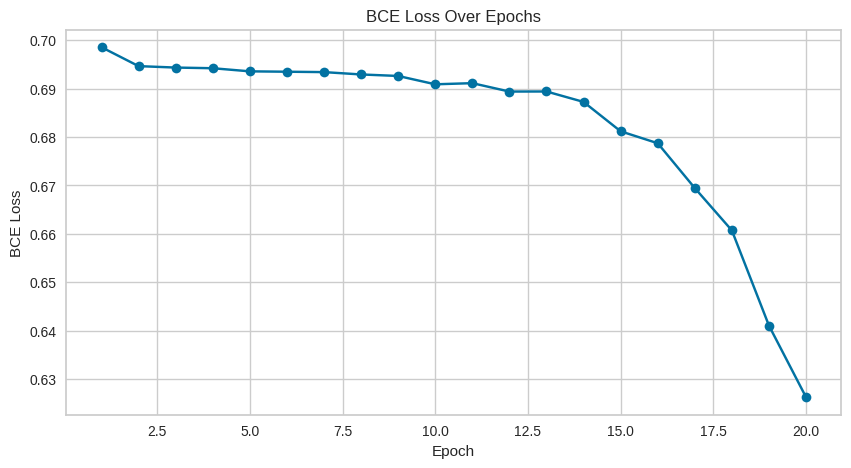

In [ ]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set_5[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

The training model is saved and all the layers can be seen.

In [ ]:
# Now lets save our trained model
# save the trained model
torch.save(model_5, 'model_5.pkl')

In [ ]:
# Lets load the model for inference
model_5_trained = torch.load('model_5.pkl')

# Set the Model to Evaluation Mode
model_5_trained.eval()

Sequential(
  (0): Linear(in_features=4, out_features=6, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.15, inplace=False)
  (3): Linear(in_features=6, out_features=3, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.15, inplace=False)
  (6): Linear(in_features=3, out_features=1, bias=True)
  (7): Sigmoid()
)

In [ ]:
output

tensor([[0.2464]], grad_fn=<SigmoidBackward0>)

# Model evaluation

The training model prediction is then compared to the test data, which shows all the predicted probabilities for each sample.

In [ ]:
# Initialize a variable to store the total loss
total_loss = 0.0

# Initialize a variable to store all the predictions
all_predictions = []

# Loop over each sample in the test dataset
for i in range(X_test_tensor.size(0)):

    # Forward pass: compute predicted y by passing x to the model
    output = model_5(X_test_tensor[i].reshape(-1))

    # Compute and print loss
    loss = loss_BCE(output, y_test_tensor[i].reshape(-1))
    total_loss += loss.item()

    # Store the predictions
    all_predictions.append(output.detach().numpy())

# Calculate the average loss over all test samples
average_loss = total_loss / X_test_tensor.size(0)
print(f'Average Loss on Test Set: {average_loss:.4f}')

# Convert all_predictions to a tensor for further calculations
all_predictions_tensor = torch.tensor(all_predictions).squeeze()

Average Loss on Test Set: 0.5975


In [ ]:
all_predictions_tensor

tensor([0.3560, 0.5807, 0.6592, 0.5575, 0.6346, 0.5175, 0.4117, 0.2994, 0.6002,
        0.5689, 0.5689, 0.5811, 0.6275, 0.2777, 0.4292, 0.3542, 0.3375, 0.3190,
        0.5979, 0.5619, 0.3284, 0.5693, 0.4102, 0.2994, 0.3835, 0.2346, 0.5744,
        0.3686, 0.6288, 0.6575, 0.6312, 0.2953, 0.5689, 0.2492, 0.3733, 0.5832,
        0.5952, 0.5782, 0.6542, 0.3580, 0.3059, 0.6195, 0.5391, 0.3801, 0.5626,
        0.3837, 0.3521, 0.4383, 0.6460, 0.6311, 0.5175, 0.3705, 0.5894, 0.2855,
        0.5563, 0.5318, 0.5836, 0.4194, 0.4877, 0.3442, 0.6388, 0.5090, 0.6692,
        0.2890, 0.3904, 0.5812, 0.4493, 0.2601, 0.5689, 0.6484, 0.2665, 0.2930,
        0.6046, 0.3252, 0.4781, 0.3452, 0.6733, 0.2488, 0.3157, 0.6439, 0.3601,
        0.4775, 0.5853, 0.6062, 0.2800, 0.5937, 0.2746, 0.3968, 0.4678, 0.3733,
        0.3102, 0.3339, 0.6418, 0.4654, 0.4960, 0.5890, 0.3915, 0.3747, 0.5763,
        0.4353, 0.4120, 0.6037, 0.3019, 0.4342, 0.6560, 0.2855, 0.6427, 0.5824,
        0.6391, 0.3607, 0.2637, 0.3445, 

Creating a Confusion Matrix and seeing the predictibility of the training model. The prediction are made to be binary by saying all prediction above 50% will predict the woman have diabetese (outcome = 1) and all prediction below 50% will predict that the woman does not have diabetese.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[67 35]
 [15 28]]


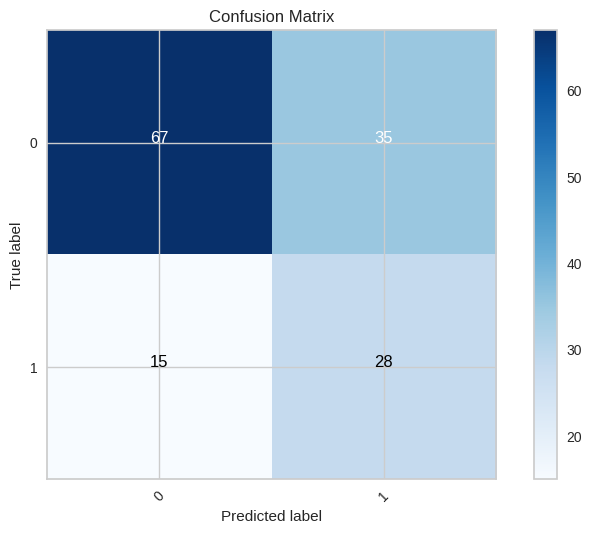

In [ ]:
# Convert predicted probabilities to binary labels
threshold = 0.5
predicted_labels = (all_predictions_tensor > threshold).long()

# Calculate confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), predicted_labels.numpy())

# Plot confusion matrix
plot_confusion_matrix(cm, classes=[0, 1], title='Confusion Matrix')
plt.show()

In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.6551724137931034

The trained model have a prediction accuracy above 60%, with it being very good at predicting true negative values, which is better than a random guess of 50%, so the predictive power of the model is atleast partially good.

Below is the parameters for all layers with the tensors, bias and weight shown.

In [ ]:
# Print the parameters of all layers
for name, param in model_5_trained.named_parameters():
    print(f"Layer: {name}")
    print(f"Size: {param.size()}")
    print(f"Values: \n{param.data}\n")

Layer: 0.weight
Size: torch.Size([6, 4])
Values: 
tensor([[-0.4663,  0.4512,  0.0226, -0.2031],
        [ 0.4727,  0.2937, -0.1320,  0.1782],
        [-0.4676,  0.2950,  0.0119, -0.2122],
        [ 0.4544,  0.2330,  0.1168,  0.4323],
        [-0.1381,  0.1799,  0.4703,  0.2549],
        [ 0.3392,  0.3545,  0.0887,  0.2260]])

Layer: 0.bias
Size: torch.Size([6])
Values: 
tensor([ 0.4748, -0.2499, -0.4841,  0.1317, -0.4311,  0.0777])

Layer: 3.weight
Size: torch.Size([3, 6])
Values: 
tensor([[ 0.1801, -0.1114,  0.4019, -0.1405,  0.0864, -0.3289],
        [-0.3353, -0.2678, -0.2203, -0.2054,  0.0364, -0.3628],
        [ 0.2156, -0.0686, -0.2690, -0.3141,  0.3899, -0.0728]])

Layer: 3.bias
Size: torch.Size([3])
Values: 
tensor([-0.1511,  0.0197, -0.2433])

Layer: 6.weight
Size: torch.Size([1, 3])
Values: 
tensor([[ 0.1703,  0.1119, -0.1952]])

Layer: 6.bias
Size: torch.Size([1])
Values: 
tensor([-0.0056])



Fromt the above print we have detail of the parameters for each layer in the final deep learning model.

From the first layer (Layer: 0.weight) have the torch size which is [6,4] and gives an indication that the layer has has 6 outputs and 4 inputs.

Afterwards we get the bias of the layer with 6 output units

Then we get a layer with a size of [3,6] and gives an idication that the layer has 6 inputs and 3 outputs

Afterwards we get the bias of the layer with 3 output units

Then we get the layer with a size of [1,3] and gives an idication that the layer has 3 inputs and 1 output

Afterwards we get the bias of the layer with 1 output unit

From this we can calculate the total number of weights parameters and bias parameters by add them together, and get the following:

Weight parameters = 35
Bias parameters = 10
which means that the deep learning model has a total of 45 parameters